In [1]:
%pip install pandas 
%pip install seaborn
%pip install numpy
%pip install matplotlib 
%pip install Scikit-learn 

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/f8/8c/9ad173c5cd2c7178c84075c02ec37b5d1d53fb1d015f51ea3e623ea9c31c/pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Obtaining dependency information for numpy<2,>=1.23.2 from https://files.pythonhosted.org/packages/5a/62/007b63f916aca1d27f5fede933fda3315d931ff9b2c28b9c2cf388cd8edb/numpy-1.26.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.26.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependenc

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_path = '/home/cyclops/Documents/nmims hackathon/DL network/train_data.csv' 

df = pd.read_csv(file_path)

df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

df.head()

,,transaction_id,product_id,category,unit_price,quantity,total,timestamp
0,0,fbe2f35d-29fe-4a51-95fa-8a37563467b6,c95b1e52-c0ad-44ac-b569-328732b3c284,fruit,2.94,4,11.76,2012-11-30 14:06:28
1,1,0aace3a4-7f59-4c3c-add5-348f02ecbb7a,9e81ff91-4a02-4739-aac0-0fb3065026d6,fruit,1.97,2,3.94,2015-08-20 05:52:40
2,2,ec19d65c-2a62-4de9-942d-624ab4cfe999,1ffed4ab-c2e2-43aa-8f11-ec763e4e7249,fruit,2.93,5,14.65,2010-12-16 16:38:33
3,3,aa3aadc9-c3d0-45f4-9835-2bec0477b701,fc49c2d5-7150-49e4-beee-20ec2cd577ed,fruit,1.48,1,1.48,2012-05-19 12:24:24
4,4,7183edba-8336-4eb0-a44e-b63b00fcd1ee,954bcb8c-62b7-4ad6-8fc3-a80b1858c3f0,fruit,2.74,2,5.48,2015-02-25 02:51:25


In [12]:

null_values = df.isnull().sum()

print(null_values)


transaction_id    0
product_id        0
category          0
unit_price        0
quantity          0
total             0
timestamp         0
dtype: int64


- Descriptive Statistics

In [14]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,2.995739,3.000894,8.985227
std,1.144150,1.411908,5.661452
min,1.000000,1.000000,1.000000
25%,2.030000,2.000000,4.370000
50%,3.010000,3.000000,7.840000
75%,3.970000,4.000000,12.690000
max,5.000000,5.000000,25.000000


## DATA VISUALISATION 

---



---




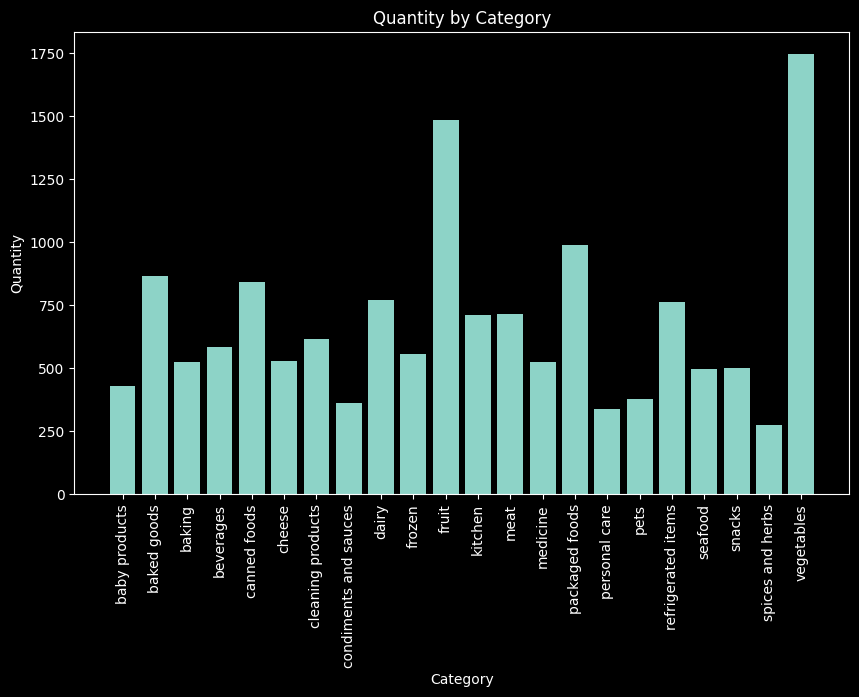

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/cyclops/Documents/nmims hackathon/DL network/train_data.csv')

sample_df = df.sample(n=5000)  

grouped_df = sample_df.groupby('category')['quantity'].sum().reset_index()

plt.style.use('dark_background') 

plt.figure(figsize=(10, 6))
plt.bar(grouped_df['category'], grouped_df['quantity'])
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Quantity by Category')
plt.xticks(rotation=90)
plt.show()


In [9]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

In [8]:
import pandas as pd
%pip install altair
import altair as alt

df = pd.read_csv('/home/cyclops/Documents/nmims hackathon/DL network/train_data.csv')
plt.style.use('dark_background')

df_category = df.groupby('category').agg({'transaction_id': 'count', 'total': 'sum'}).reset_index()

alt.Chart(df_category).mark_bar().encode(
    x='category:N',
    y='transaction_id:Q',  
).properties(
    width=1000,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).configure_view(
    strokeWidth=0
)


Note: you may need to restart the kernel to use updated packages.


alt.Chart(...)

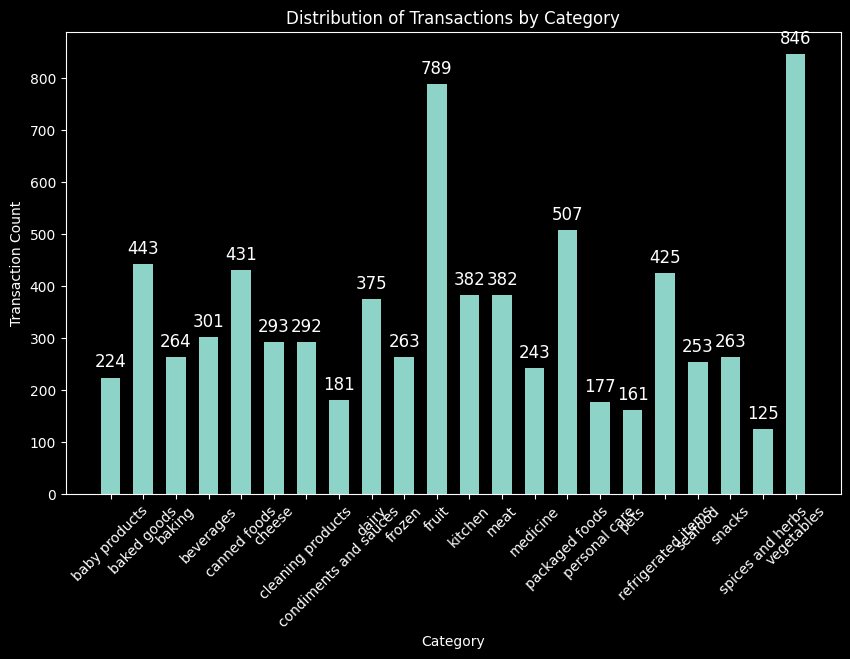

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
df = pd.read_csv('/home/cyclops/Documents/nmims hackathon/DL network/train_data.csv')

df_category = df.groupby('category').agg({'transaction_id': 'count', 'total': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
bar_width = 0.6

plt.bar(df_category['category'], df_category['transaction_id'], width=bar_width)
plt.xlabel('Category')
plt.ylabel('Transaction Count') 
plt.title('Distribution of Transactions by Category')


for i, count in enumerate(df_category['transaction_id']):
    plt.text(i, count + 20, str(count), ha='center', fontsize=12)


plt.xticks(rotation=45)


plt.show()


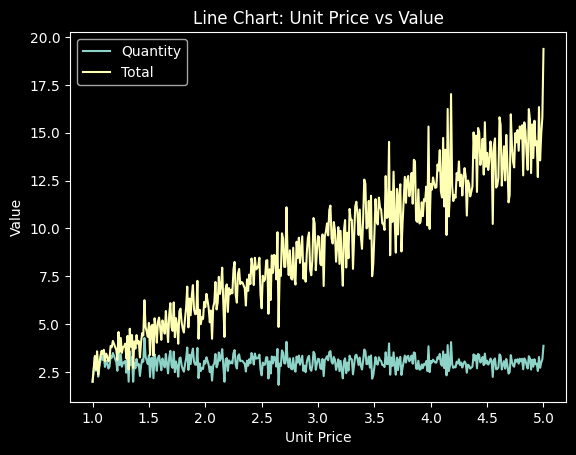

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/cyclops/Documents/nmims hackathon/DL network/train_data.csv')

grouped_df = df.groupby('unit_price').agg({'quantity': 'mean', 'total': 'mean'}).reset_index()

grouped_df = grouped_df.sort_values('unit_price')

plt.style.use('dark_background')

plt.plot(grouped_df['unit_price'], grouped_df['quantity'], label='Quantity')
plt.plot(grouped_df['unit_price'], grouped_df['total'], label='Total')
plt.xlabel('Unit Price')
plt.ylabel('Value')
plt.title('Line Chart: Unit Price vs Value')
plt.legend()

plt.show()


In [12]:
df.shape


(7620, 8)